<a href="https://colab.research.google.com/github/alejandro-cermeno/2021_Market_Timing-Cermeno/blob/main/returns_figure_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

June 2021


## **Data preparation**

In [78]:
%%capture
!pip install arch
!pip install pmdarima

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# for unit root testing
from arch.unitroot import (ADF, PhillipsPerron)

<div style="text-align: right">$y_{t}=100\times\left[\log\left(p_{t}\right)-\log\left(p_{t-1}\right)\right]$. </div>

In [ ]:
# data collection
path = 'https://git.io/Jnovh'
series = pd.read_excel(path, sheet_name = 'source', index_col = 0)

# transformation to logarithmic returns
logret_series = (100 * (np.log(series) - np.log(series.shift(1))))

# save logret_series dataframe
logret_series.to_excel("logret_series.xlsx")  

# output configuration
print('Daily Latam Stock Market Prices')
display(series.head())
print('')
print('Daily Latam Stock Market Returns')
display(logret_series.head())

## **Descriptive Statistics for Stock Markets Returns**


In [5]:
def descriptive_stats(ts):

  # the number of observations, standard deviation, minimum, maximum, skewness, 
  # kurtosis are selected for the table
  descriptive = pd.concat([ts.describe()\
                            .loc[['count', 'mean', 'std', 'min', 'max']].T, 
                            ts.skew().rename('skew'), ts.kurt().\
                            rename('kurt')], axis=1).round(2)
  descriptive['count'] = descriptive['count'].astype(int)


  # start date is added
  start_date = ts.apply(lambda ts: ts.first_valid_index())
  start_date = pd.DataFrame(start_date, columns=['Fecha Inicio'])

  # end date is added
  end_date = ts.apply(lambda ts: ts.last_valid_index())
  end_date = pd.DataFrame(end_date, columns=['Fecha Fin'])

  descriptive = pd.concat([start_date, end_date, descriptive], axis = 1)

  # output
  display(descriptive)
  print('')
  print('')
  print('Table in LaTeX')
  print('')
  print(descriptive.to_latex()) # LaTeX table creation

# function call for returns
print('Descriptive Statistics for Stock Markets Returns')
print('')
descriptive_stats(logret_series)

Descriptive Statistics for Stock Markets Returns



,Fecha Inicio,Fecha Fin,count,mean,std,min,max,skew,kurt
MERVAL,1991-12-26,2021-05-31,7678,0.06,2.30,-47.69,16.12,-1.43,27.93
IBOV,1995-03-16,2021-05-31,6838,0.05,1.97,-17.23,28.82,0.09,13.97
IPSA,1990-08-09,2021-05-31,8038,0.05,1.14,-15.22,11.80,-0.31,12.93
IGBC,2001-07-26,2021-05-31,5178,0.05,1.15,-11.05,14.69,-0.18,15.50
MEXBOL,1994-03-31,2021-05-31,7088,0.04,1.40,-14.31,12.15,0.03,7.51
SPBLPGPT,2002-02-07,2021-05-31,5038,0.06,1.34,-13.29,12.82,-0.57,12.89




Table in LaTeX

\begin{tabular}{lllrrrrrrr}
\toprule
{} & Fecha Inicio &  Fecha Fin &  count &  mean &   std &    min &    max &  skew &   kurt \\
\midrule
MERVAL   &   1991-12-26 & 2021-05-31 &   7678 &  0.06 &  2.30 & -47.69 &  16.12 & -1.43 &  27.93 \\
IBOV     &   1995-03-16 & 2021-05-31 &   6838 &  0.05 &  1.97 & -17.23 &  28.82 &  0.09 &  13.97 \\
IPSA     &   1990-08-09 & 2021-05-31 &   8038 &  0.05 &  1.14 & -15.22 &  11.80 & -0.31 &  12.93 \\
IGBC     &   2001-07-26 & 2021-05-31 &   5178 &  0.05 &  1.15 & -11.05 &  14.69 & -0.18 &  15.50 \\
MEXBOL   &   1994-03-31 & 2021-05-31 &   7088 &  0.04 &  1.40 & -14.31 &  12.15 &  0.03 &   7.51 \\
SPBLPGPT &   2002-02-07 & 2021-05-31 &   5038 &  0.06 &  1.34 & -13.29 &  12.82 & -0.57 &  12.89 \\
\bottomrule
\end{tabular}



## **Daily Latam Stock Market Returns Figure**

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Daily Latam Stock Market Returns Figure.


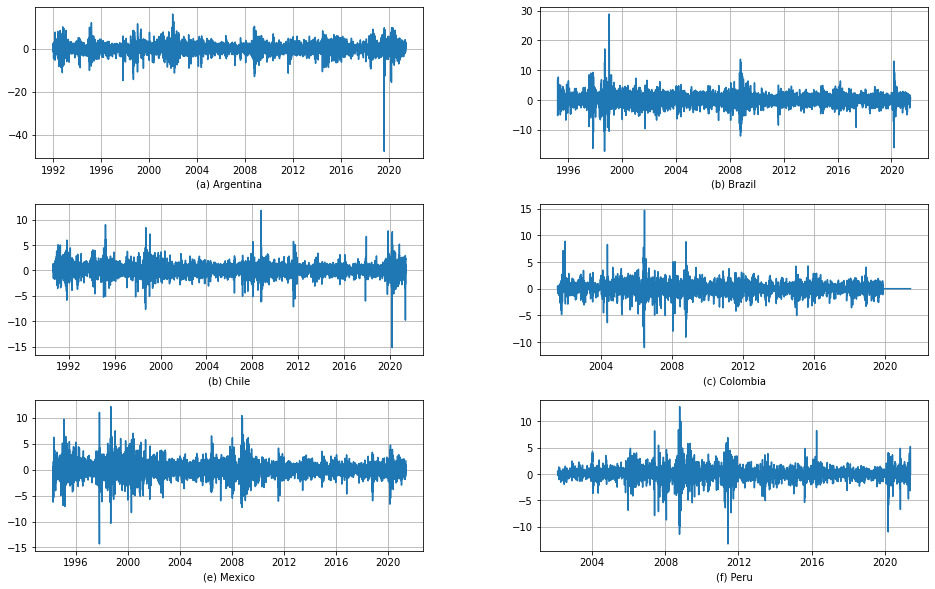

In [7]:
def graph(ts, country_name):

  nrows = np.ceil(ts.shape[1] / 2).astype(int) # number of rows
  ncols = 2                                    # number of columns

  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  for col, ax in zip(ts.columns, axes.flatten()):
    ax.plot(ts.index, ts[col])
    ax.set_xlabel(country_name[ts.columns.get_loc(col)], fontname= 'Times New Roman')
    ax.grid()

# function call for returns
print('Daily Latam Stock Market Returns Figure.')
country_name = ['(a) Argentina', '(b) Brazil', '(b) Chile', '(c) Colombia', '(e) Mexico', '(f) Peru']
graph(logret_series, country_name)

## **Others**

### Unit root tests



The [arch](https://arch.readthedocs.io/en/latest/index.html) library from Sheppard (2021) is used.

The null hypothesis of the Phillips-Perron (PP) test is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then the null cannot be rejected that there and the series appears to be a unit root.

#### Augmented Dickey-Fuller unit root test
Parameters are `lags`, `trend` ('n', 'c', 'ct'), `max_lags` and `method` ('AIC', BIC', t-stat').

In [ ]:
def adf_test(ts, country_name):

  adf = ADF(ts.iloc[:,0].dropna(), trend = 'c', method = 'AIC')
  print('Augmented Dickey-Fuller unit root test')
  print('======================================')
  print('trend:                 ', adf.trend)
  print('Null Hypothesis:       ', adf.null_hypothesis)
  print('Alternative Hypothesis:', adf.alternative_hypothesis)
  print('')

  for i in range(ts.shape[1]):

    adf = ADF(ts.iloc[:,i].dropna(), trend = 'c', method = 'AIC')
    
    print('For', country_name[i])
    print('------------------------')
    print('test statistic:', round(adf.stat,4))
    print('p-value:        ', adf.pvalue)
    print('lags:           ', adf.lags)
    print('critical values:', adf.critical_values)
    print('------------------------')
    print('')


# adf_test() function call for returns
adf_test(logret_series, country_name)

#### Phillips-Perron unit root test
Parameters are `lags`, `trend` ('n', 'c', 'ct') and `test_type` ('tau, 'rho') where 'tau' is based on the t-stat and 'rho' uses a test based on nobs times the re-centered regression coefficient.

In [ ]:
def pp_test(ts, country_name):

  pp = PhillipsPerron(ts.iloc[:,0].dropna(), trend = 'c')
  print('Phillips-Perron unit root test')
  print('======================================')
  print('trend:                 ', pp.trend)
  print('Null Hypothesis:       ', pp.null_hypothesis)
  print('Alternative Hypothesis:', pp.alternative_hypothesis)
  print('')

  for i in range(ts.shape[1]):

    pp = PhillipsPerron(ts.iloc[:,i].dropna(), trend = 'c')
    
    print('For', country_name[i])
    print('------------------------')
    print('test statistic:', round(adf.stat,4))
    print('p-value:        ', pp.pvalue)
    print('lags:           ', pp.lags)
    print('critical values:', pp.critical_values)
    print('------------------------')
    print('')

# pp_test() function call for returns
pp_test(logret_series, country_name)

### Daily Latam Stock Market Prices Figure.

Daily Latam Stock Market Prices Figure.


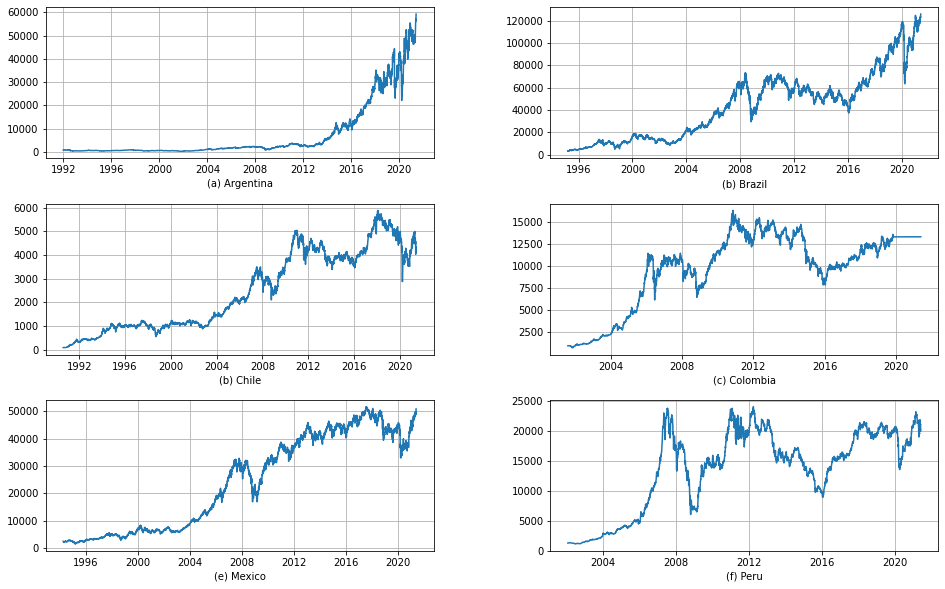

In [8]:
# graph function call for returns
print('Daily Latam Stock Market Prices Figure.')
country_name = ['(a) Argentina', '(b) Brazil', '(b) Chile', '(c) Colombia', '(e) Mexico', '(f) Peru']
graph(series, country_name)

### Descriptive Statistics for Stock Markets Prices.

In [9]:
# descriptive_stats function call for prices
print('Descriptive Statistics for Stock Markets Prices')
print('')
descriptive_stats(series)

Descriptive Statistics for Stock Markets Prices



,Fecha Inicio,Fecha Fin,count,mean,std,min,max,skew,kurt
MERVAL,1991-12-25,2021-05-31,7679,7219.73,12335.35,200.86,59268.94,2.11,3.49
IBOV,1995-03-15,2021-05-31,6839,43532.53,29924.58,2870.10,126215.70,0.50,-0.52
IPSA,1990-08-08,2021-05-31,8039,2478.70,1650.02,89.87,5880.47,0.28,-1.41
IGBC,2001-07-25,2021-05-31,5179,9773.40,4185.50,776.54,16278.88,-0.89,-0.38
MEXBOL,1994-03-30,2021-05-31,7089,24125.01,17156.18,1447.52,51713.38,0.04,-1.65
SPBLPGPT,2002-02-06,2021-05-31,5039,13684.10,6756.10,1109.89,24051.62,-0.58,-0.96




Table in LaTeX

\begin{tabular}{lllrrrrrrr}
\toprule
{} & Fecha Inicio &  Fecha Fin &  count &      mean &       std &      min &        max &  skew &  kurt \\
\midrule
MERVAL   &   1991-12-25 & 2021-05-31 &   7679 &   7219.73 &  12335.35 &   200.86 &   59268.94 &  2.11 &  3.49 \\
IBOV     &   1995-03-15 & 2021-05-31 &   6839 &  43532.53 &  29924.58 &  2870.10 &  126215.70 &  0.50 & -0.52 \\
IPSA     &   1990-08-08 & 2021-05-31 &   8039 &   2478.70 &   1650.02 &    89.87 &    5880.47 &  0.28 & -1.41 \\
IGBC     &   2001-07-25 & 2021-05-31 &   5179 &   9773.40 &   4185.50 &   776.54 &   16278.88 & -0.89 & -0.38 \\
MEXBOL   &   1994-03-30 & 2021-05-31 &   7089 &  24125.01 &  17156.18 &  1447.52 &   51713.38 &  0.04 & -1.65 \\
SPBLPGPT &   2002-02-06 & 2021-05-31 &   5039 &  13684.10 &   6756.10 &  1109.89 &   24051.62 & -0.58 & -0.96 \\
\bottomrule
\end{tabular}

